In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
nx.__version__

'3.2.1'

In [2]:
# def plot_graph(G1):
#     fig, ax = plt.subplots()
#     for n in G1.nodes:
#         ax.plot(n[0],n[1],'bo', markersize=4)
#     for e in G1.edges:
#         ax.plot([e[0][0],e[1][0]],[e[0][1],e[1][1]], 'g')

In [27]:
# (node, danger_power)
# 0-safe; 9-danger
default_safe_value=0
#1

# G = nx.grid_graph(dim=[25, 25])  # nodes are two-tuples (x,y)

# danger_points=[((14,13),9),((10,12),9),((0,15),7),((6,6),8),((3,10),7),((24,22),6), ((3,5),7), ((5,23),9),((23,10),7),((8,0),9),((17,2),9),((8,19),5),((8,18),9),((9,23),9),((6,2),9),((5,24),9),((20,20),8)]

# origin_point_x= 23
# origin_point_y= 1
# destination_point_x=1
# destination_point_y= 23

#2

# G = nx.grid_graph(dim=[40, 20])  # nodes are two-tuples (x,y)

# danger_points=[((5,7),9),((3,7),8),((7,7),8),((16,23),8),((18,23),8),((14,23),5),((12,23),9),((10,23),9),((14,20),7),((14,26),7),((2,37),6),((2,39),5),((4,36),9)]

# origin_point_x= 1
# origin_point_y= 1
# destination_point_x=18
# destination_point_y= 38


#3

G = nx.grid_graph(dim=[30, 50])  # nodes are two-tuples (x,y)
pos = nx.kamada_kawai_layout(G)

G=G.to_directed()


danger_points=[((5,10),9),((3,10),8),((7,10),8),((7,10),9),((8,9),8),((5,0),8),((16,23),8),((18,23),8),((14,23),5),
               ((12,23),9),((10,23),9),((14,20),7),((14,26),7), ((20,10),6),((26,9),9),((24,14),9),((24,10),8),((24,18),8),
               ((24,16),9),((43,14),9),((40,15),9),((45,15),8),((37,15),8),((28,15),9),((48,15),8),
              ((45,7),9),((46,7),9),((45,8),9),
              ((45,16),9),((45,17),9),
              ((25,2),9),((24,2),9),((25,3),9),
              ((30,15),9),((29,14),9),((28,15),9),
              ((10,30),9),((11,29),9),((9,30),9),((8,28),9),((20,0),9),((19,0),9)]


origin_point_x= 3
origin_point_y= 7
destination_point_x= 45
destination_point_y= 28


origin_node= (origin_point_x,origin_point_y)
destination_node=(destination_point_x,destination_point_y)

# plot_graph(G)

In [28]:
def dist_euclidean(a, b):
    (x1,y1)=a
    (x2,y2)=b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    # return 0

In [29]:
def gauss_filter(x,y,p1,p2, sigma):
    # return np.exp(-((p1-x)*(p1-x)+((p2-y)*(p2-y)))/(2*sigma*sigma))/(2*np.pi*(sigma*sigma))
    return np.exp(-((p1-x)*(p1-x)+((p2-y)*(p2-y)))/(2*sigma*sigma))

In [30]:
def get_nodes_attributes (G1, danger_points1,name_attr1:str,sigma_local=0.1, sigma_wide=3, k_local=1,k_wide=1,default_value=0,improving_attr=True):
    attr_dict={n:{name_attr1:default_value} for n in G1.nodes}
    # print(attr_dict.values())
    L=list(attr_dict.values())
    for n in G1.nodes:
        for i in range(len(danger_points1)):
            (d_point,d_value)=danger_points1[i]
            # dist= dist_euclidean(d_point,n)
            # attr_dict[n]["interestingness_attr"]=attr_dict[n]["interestingness_attr"]+interestingness_func(feature)/(0.01*dist)
            addition_value=d_value*(gauss_filter(n[0],n[1],d_point[0],d_point[1],sigma_local)*k_local+gauss_filter(n[0],n[1],d_point[0],d_point[1],sigma_wide)*k_wide)
            if improving_attr:
                attr_dict[n][name_attr1]=attr_dict[n][name_attr1]-addition_value
            else:
                attr_dict[n][name_attr1]=attr_dict[n][name_attr1]+addition_value
    if improving_attr:
        min_attr_dict= min([L[i][name_attr1] for i in range(len(L))])
    # print(min_attr_dict)
    # if improving_attr:
        for n in G1.nodes:
            attr_dict[n][name_attr1]=attr_dict[n][name_attr1]+abs(min_attr_dict)
    return attr_dict

In [31]:
danger_attr=get_nodes_attributes(G,danger_points,"danger_attr",default_value=default_safe_value,improving_attr=False)
nx.set_node_attributes(G,danger_attr)
[G.nodes[n]["danger_attr"] for n in G.nodes]

[2.0291102575716136,
 1.9847916624391417,
 1.846976997365639,
 1.7807264483742982,
 1.9886940044802477,
 2.6394904342652303,
 3.7853702309943493,
 5.2960258074770445,
 6.850254594861646,
 8.020607316900438,
 8.43769007836092,
 7.955325420401853,
 6.716422547610034,
 5.07619365108421,
 3.434258198794179,
 2.0802019015306694,
 1.1292745755022686,
 0.5519449414918381,
 0.24778375486680052,
 0.1109086239217833,
 0.06315693457747533,
 0.05918284565235051,
 0.07815066862249287,
 0.11319171207980581,
 0.16280899487515843,
 0.22453707964579322,
 0.2909882779353995,
 0.3493355728788236,
 0.38481923534076534,
 0.3867334081663245,
 3.342702864816738,
 3.2640101886806367,
 3.022506960185793,
 2.8814490747591925,
 3.1622750507114126,
 4.1298840749006605,
 5.864544689164439,
 8.162214055946798,
 10.525798237315474,
 12.29851726285901,
 12.916748055957688,
 12.161203489247761,
 10.254621734138562,
 7.741909644595648,
 5.233014419688868,
 3.1681673946816846,
 1.7213804038943714,
 0.8466624668891454,
 

In [32]:
def get_edges_attributes(G1,name_attr1,k_length=0.5,k_attr=0.5):
# def get_edges_attributes(G1,name_attr1,k_length=0.2,k_attr=0.8):
    attr_dict={edge:{name_attr1:0} for edge in G1.edges}
    for edge in G1.edges:
        # IF DIGRAF
        # attr_dict[edge][name_attr1]=G1.nodes[edge[1]]["danger_attr"]*k_attr+k_length*G1.edges[edge]["length"]
        # IF NOT DIRECTED GRAF:
        max_val=max(G1.nodes[edge[1]]["danger_attr"],G1.nodes[edge[0]]["danger_attr"])
        attr_dict[edge][name_attr1]=max_val*k_attr+k_length*G1.edges[edge]["length"]
    return attr_dict
    

In [33]:
nx.set_edge_attributes(G,{edge:{"length":1} for edge in G.edges})
danger_attr_edge=get_edges_attributes(G,"weight")
# danger_attr_edge=get_edges_attributes(G,"danger_attr_edge")
nx.set_edge_attributes(G,danger_attr_edge)
# [G.edges[e]["danger_attr_edge"] for e in G.edges]

In [34]:
# path_orig_dest=nx.algorithms.shortest_paths.astar_path(G,origin_node,destination_node, weight="",heuristic=dist_euclidean)
path_orig_dest_nodes=nx.algorithms.shortest_paths.astar_path(G,origin_node,destination_node,heuristic=dist_euclidean,weight="danger_attr_edge")
# path_orig_dest_nodes

In [35]:
path_orig_dest_edges=[(path_orig_dest_nodes[i],path_orig_dest_nodes[i+1])for i in range(len(path_orig_dest_nodes)-1)]
# path_orig_dest_edges

In [36]:
# pos = nx.kamada_kawai_layout(G)

ZeroDivisionError: integer division or modulo by zero

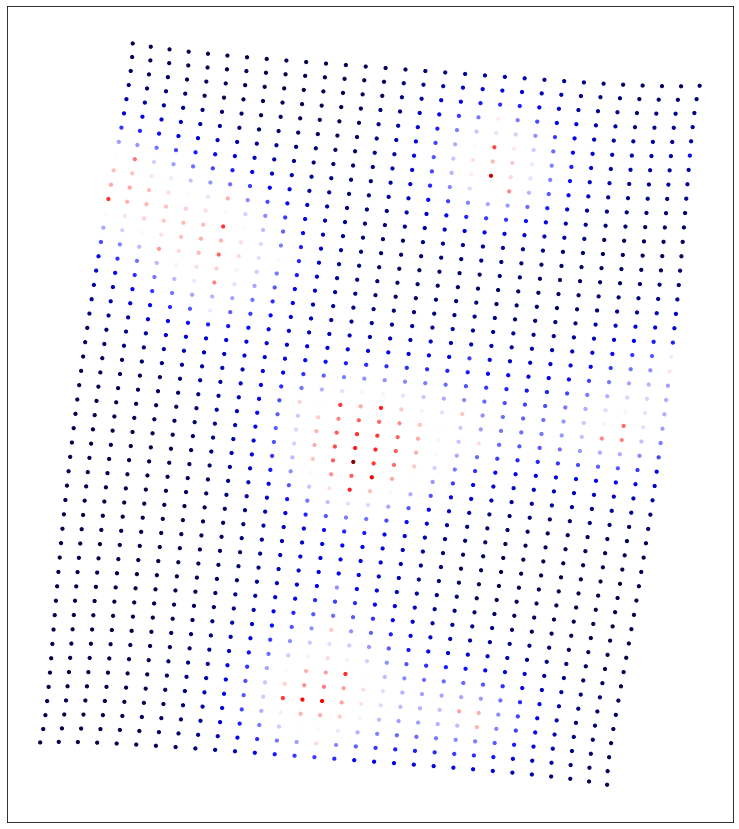

In [37]:
from matplotlib.pyplot import figure

# figure(figsize=(15, 15), dpi=80)
fig, ax = plt.subplots()
fig.set_size_inches(13,15)
# fig.set_dpi(100)

# pos = nx.kamada_kawai_layout(G)
colormap=plt.cm.seismic
# nx.draw(G, pos=pos, node_color="red",node_size=4,edge_cmap=plt.cm.seismic, width=list(nx.get_edge_attributes(G,'danger_attr_edge').values()))
nx.draw(G, pos=pos, cmap=colormap,node_color=list(nx.get_node_attributes(G,'danger_attr').values()),node_size=10,
        edge_cmap=colormap, edge_color=list(nx.get_edge_attributes(G,'weight').values()),width=2)
        # edge_cmap=colormap, edge_color=list(nx.get_edge_attributes(G,'weight').values()),width=2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm._A = []
# plt.colorbar(sm)
fig.set_facecolor('#161616')
nx.draw_networkx_nodes(G,pos=pos,nodelist=[origin_node,destination_node],node_color=["g","r"],node_size=30)
nx.draw_networkx_edges(G,pos=pos,edgelist=path_orig_dest_edges,edge_color = "y",width=5)
plt.show()

In [38]:
   for u, v, d in G.edges(data=True):
       print(u,v,d)
       # print( d["danger_attr_edge"])

(0, 0) (1, 0) {'length': 1, 'weight': 2.171351432408369}
(0, 0) (0, 1) {'length': 1, 'weight': 1.5145551287858068}
(0, 1) (0, 0) {'length': 1, 'weight': 1.5145551287858068}
(0, 1) (1, 1) {'length': 1, 'weight': 2.132005094340318}
(0, 1) (0, 2) {'length': 1, 'weight': 1.4923958312195709}
(0, 2) (0, 1) {'length': 1, 'weight': 1.4923958312195709}
(0, 2) (1, 2) {'length': 1, 'weight': 2.0112534800928965}
(0, 2) (0, 3) {'length': 1, 'weight': 1.4234884986828193}
(0, 3) (0, 2) {'length': 1, 'weight': 1.4234884986828193}
(0, 3) (1, 3) {'length': 1, 'weight': 1.9407245373795963}
(0, 3) (0, 4) {'length': 1, 'weight': 1.494347002240124}
(0, 4) (0, 3) {'length': 1, 'weight': 1.494347002240124}
(0, 4) (1, 4) {'length': 1, 'weight': 2.0811375253557065}
(0, 4) (0, 5) {'length': 1, 'weight': 1.8197452171326152}
(0, 5) (0, 4) {'length': 1, 'weight': 1.8197452171326152}
(0, 5) (1, 5) {'length': 1, 'weight': 2.5649420374503302}
(0, 5) (0, 6) {'length': 1, 'weight': 2.3926851154971747}
(0, 6) (0, 5) {'le

In [39]:
nodes_to_visit=[(3,7),(46,2),(40,10),(45,20),(20,25),(4,28),(1,15)]

In [48]:
path_circular_nodes=nx.algorithms.approximation.traveling_salesman_problem(G=G,
                                                            nodes=nodes_to_visit, 
                                                                           method=nx.algorithms.approximation.asadpour_atsp, 
                                                                           # weight="danger_attr_edge",cycle=False)
                                                                           cycle=False)
# tsp = nx.approximation.traveling_salesman_problem
# # SA_tsp = nx.approximation.simulated_annealing_tsp
# # method = lambda G, wt: SA_tsp(G, "greedy", weight=wt, temp=500)
# alg = nx.approximation.asadpour_atsp
# method = lambda G, wt: alg(G, weight=wt)
# path_circular_nodes= tsp(G=G,nodes=nodes_to_visit, weight="danger_attr_edge", method=method, cycle=False)
# path_circular_nodes

# dimod.traveling_salesperson

In [49]:
path_circular_edges=[(path_circular_nodes[i],path_circular_nodes[i+1])for i in range(len(path_circular_nodes)-1)]
path_circular_edges

[((3, 7), (2, 7)),
 ((2, 7), (1, 7)),
 ((1, 7), (0, 7)),
 ((0, 7), (0, 8)),
 ((0, 8), (0, 9)),
 ((0, 9), (0, 10)),
 ((0, 10), (0, 11)),
 ((0, 11), (0, 12)),
 ((0, 12), (0, 13)),
 ((0, 13), (0, 14)),
 ((0, 14), (0, 15)),
 ((0, 15), (1, 15)),
 ((1, 15), (1, 16)),
 ((1, 16), (1, 17)),
 ((1, 17), (1, 18)),
 ((1, 18), (1, 19)),
 ((1, 19), (1, 20)),
 ((1, 20), (1, 21)),
 ((1, 21), (1, 22)),
 ((1, 22), (1, 23)),
 ((1, 23), (1, 24)),
 ((1, 24), (1, 25)),
 ((1, 25), (1, 26)),
 ((1, 26), (1, 27)),
 ((1, 27), (1, 28)),
 ((1, 28), (2, 28)),
 ((2, 28), (3, 28)),
 ((3, 28), (4, 28)),
 ((4, 28), (3, 28)),
 ((3, 28), (2, 28)),
 ((2, 28), (1, 28)),
 ((1, 28), (1, 27)),
 ((1, 27), (1, 26)),
 ((1, 26), (1, 25)),
 ((1, 25), (1, 24)),
 ((1, 24), (1, 23)),
 ((1, 23), (1, 22)),
 ((1, 22), (1, 21)),
 ((1, 21), (1, 20)),
 ((1, 20), (1, 19)),
 ((1, 19), (2, 19)),
 ((2, 19), (3, 19)),
 ((3, 19), (3, 18)),
 ((3, 18), (4, 18)),
 ((4, 18), (5, 18)),
 ((5, 18), (6, 18)),
 ((6, 18), (6, 17)),
 ((6, 17), (7, 17)),
 ((

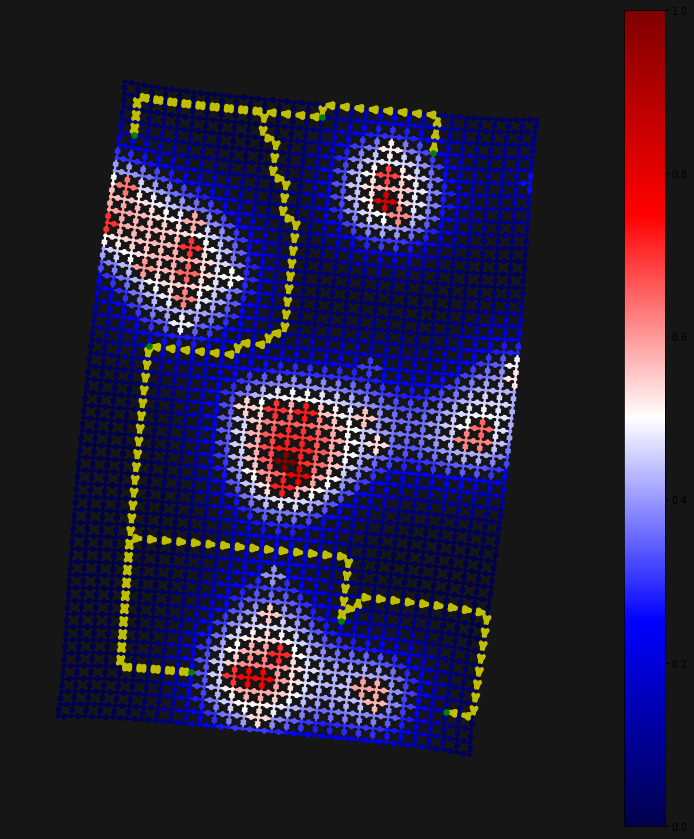

In [50]:
from matplotlib.pyplot import figure

# figure(figsize=(15, 15), dpi=80)
fig, ax = plt.subplots()
fig.set_size_inches(13,15)
# fig.set_dpi(100)

# pos = nx.kamada_kawai_layout(G)
colormap=plt.cm.seismic
# nx.draw(G, pos=pos, node_color="red",node_size=4,edge_cmap=plt.cm.seismic, width=list(nx.get_edge_attributes(G,'danger_attr_edge').values()))
nx.draw(G, pos=pos, cmap=colormap,node_color=list(nx.get_node_attributes(G,'danger_attr').values()),node_size=10,
        # edge_cmap=colormap, edge_color=list(nx.get_edge_attributes(G,'danger_attr_edge').values()),width=2)
        edge_cmap=colormap, edge_color=list(nx.get_edge_attributes(G,'weight').values()),width=2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm._A = []
plt.colorbar(sm,ax=ax)
fig.set_facecolor('#161616')
nx.draw_networkx_nodes(G,pos=pos,nodelist=nodes_to_visit,node_color=["g"],node_size=30)
nx.draw_networkx_edges(G,pos=pos,edgelist=path_circular_edges,edge_color = "y",width=5)
plt.show()